# 07-Functions

This notebook shows how we can create our own functions in Python.
## Daily exercise, part 1

Modify the function `plot_close` so that it instead takes a list of stocks and plots the daily closing price for all the stocks in the list in a single plot.

Note that the function should only plot the closing price of a stock if that stock is actually present in the data (hint: use an `if` statement inside the function).

Test the function using `closing_prices.csv` and execute the following function calls:
```
plot_close(df, ['AAPL'])
plot_close(df, ['AAPL', 'AMZN', 'BABA', 'FB'])
plot_close(df, ['AAPL', 'FAKE1', 'FAKE2', 'FB'])
```

         Date      Close Stock
0  2020-01-02  75.087502  AAPL
1  2020-01-03  74.357498  AAPL
2  2020-01-06  74.949997  AAPL
3  2020-01-07  74.597504  AAPL
4  2020-01-08  75.797501  AAPL


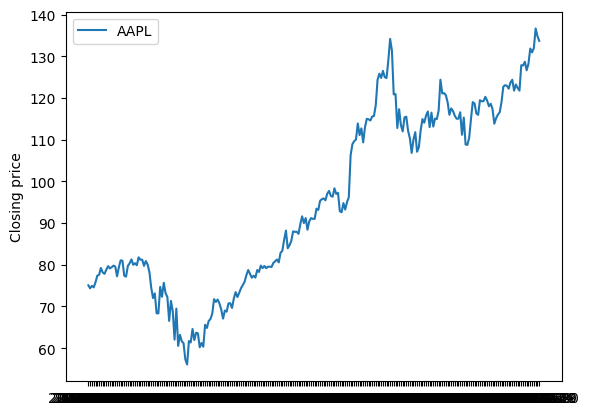

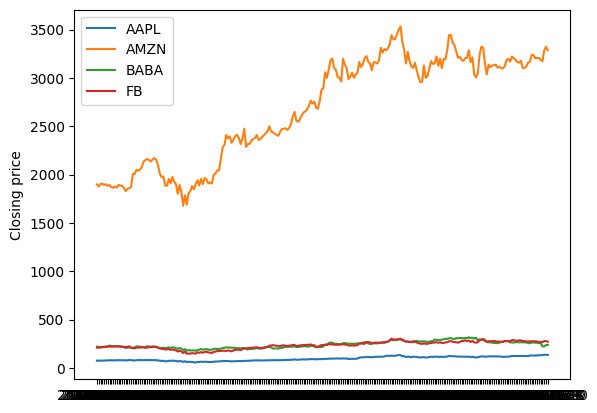

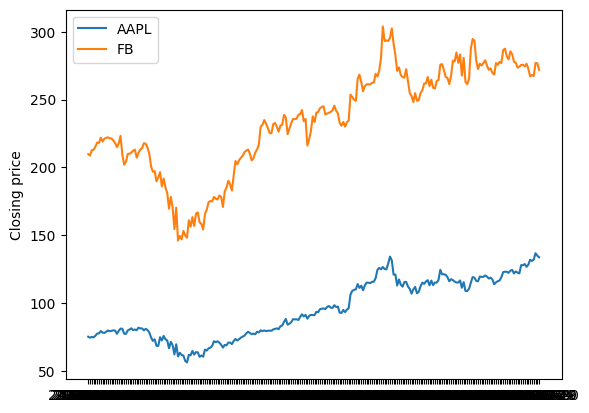

In [3]:
import pandas as pd

#Reading the CSV as DF_______________________________________________


# Set the path to your CSV file
file_path = 'closing_prices.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(df.head())


#The modified Function_______________________________________________
import pandas as pd
import matplotlib.pyplot as plt

def plot_close(df, stocks):
    # Create figure
    fig, ax = plt.subplots()

    # Loop through each stock in the list
    for stock in stocks:
        # Check if the stock is present in the data
        if stock in df['Stock'].values:
            # Extract subset
            df_subset = df[df['Stock'] == stock].copy()

            # Plot closing price
            ax.plot(df_subset['Date'], df_subset['Close'], label=stock)

    # Add axis label and legend
    ax.set_ylabel('Closing price')
    ax.legend()

    plt.show()


#Calling the function_______________________________________________

plot_close(df, ['AAPL'])
plot_close(df, ['AAPL', 'AMZN', 'BABA', 'FB'])
plot_close(df, ['AAPL', 'FAKE1', 'FAKE2', 'FB'])


#We can observe big variance in closing prices so its hard to read the graphs
#on some.




## Daily exercise, part 2

The presence of outliers, i.e. observations with "untypical" values, can heavliy influence our regression results. An important step in statistical analysis is therefore to investigate the presence of potential outliers.

In the simple regression model that we estimated first (i.e., `mpg ~ horsepower`), we saw that the model consistently underpredicted `mpg` at high levels of actual `mpg`. Could this be caused by some car models having untypical/extreme levels of horsepower?

Import `mpg.xlsx` and explore the presence of extreme values of horsepower in the data and its effect on the simple regression model (`mpg ~ horsepower`).

1. Check for outliers in `horsepower`. Present any descriptive and/or graphical analysis that you see fit.


2. Explore how much dropping a single observation, i.e. car model, from the data affects the estimated coefficient on `horsepower`:

    a. Create a function called `get_beta` that estimates a simple regression model and returns the beta coefficient for the explanatory/independent variable. The function should take three inputs: `df` (the dataset), `dep` (column name of the dependent variable) and `indep` (column name for the independent variable).
    
    b. Ceate a `for` loop where you in each iteration drop an observation from the data and use `get_beta` to retrieve the beta coefficient from that model. Note that in the first iteration you should drop the first observation from the data. In the second iteration you should keep the first observation but drop the second observation. In the third iteration you should keep the first and second observations, but drop the third one, and so on...
    
    c. Show a histogram of the estimated beta coefficients. What is your verdict? Does it seem that the estimated coefficient on `horsepower` is affected by the presence of outliers?




In [9]:
import pandas as pd

#Reading the Excel as DF_2_______________________________________________


# Set the path to your CSV file
file_path = 'mpg.xlsx'

# Read the CSV file into a DataFrame
df_2 = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(df_2.head())










    mpg  cylinders  horsepower  weight  acceleration  model_year origin  \
0  18.0          8       130.0    3504          12.0          70    usa   
1  15.0          8       165.0    3693          11.5          70    usa   
2  18.0          8       150.0    3436          11.0          70    usa   
3  16.0          8       150.0    3433          12.0          70    usa   
4  17.0          8       140.0    3449          10.5          70    usa   

                        name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  


1.


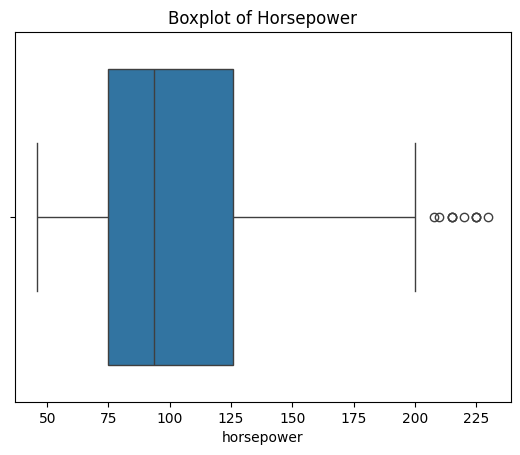

In [11]:
#Import other packages for analysis
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Check for extreme values in 'horsepower' using a boxplot
sns.boxplot(data=df_2, x='horsepower')
plt.title('Boxplot of Horsepower')
plt.show()

2.




a.


In [25]:
#Drop Na's
df_2 = df_2.dropna(subset=['horsepower', 'mpg'])

#Easy model
def get_beta(df_2, dep, indep):
    X = df_2[[indep]].values
    y = df_2[dep].values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]

#Call function
beta = get_beta(df_2, dep='mpg', indep='horsepower')
print(beta)


-0.15784473335365365


b-c.



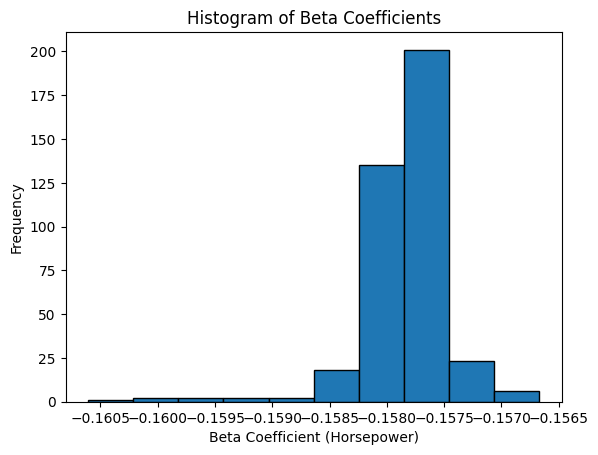

In [28]:
# Store beta coefficients
beta_coefficients = []

# Loop through each observation in df_2
for i in df_2.index:  # Use actual indices of df_2
    # Drop the i-th observation
    df_temp = df_2.drop(index=i)

    # Get beta coefficient for mpg ~ horsepower
    beta = get_beta(df_temp, dep='mpg', indep='horsepower')

    # Append to list
    beta_coefficients.append(beta)

# Visualize the beta coefficients
plt.hist(beta_coefficients, bins=10, edgecolor='black')
plt.title('Histogram of Beta Coefficients')
plt.xlabel('Beta Coefficient (Horsepower)')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the estimated beta coefficients for horsepower are tightly concentrated around a central value, with only a few outliers. This suggests that the estimated coefficient on horsepower is not significantly affected by the presence of outliers, as the overall distribution remains narrow and consistent.